# K-Means Clustering Example

In [13]:
import pandas as pd
import numpy as np
import missingno as msno

In [2]:
# import sklearn 
from sklearn.cluster import KMeans
from functions import *

In [4]:
# load data
original_data = pd.read_csv('Data\world_university_rankings_2016.csv', index_col='university_name')
original_data.head()

,world_rank,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international%,female%,male%
university_name,,,,,,,,,,,,,
California Institute of Technology,1,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,2243.0,6.9,27.0,33.0,67.0
University of Oxford,2,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34.0,46.0,54.0
Stanford University,3,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22.0,42.0,58.0
University of Cambridge,4,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,18812.0,11.8,34.0,46.0,54.0
Massachusetts Institute of Technology,5,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,11074.0,9.0,33.0,37.0,63.0


In [7]:
original_data.shape

(800, 13)

In [12]:
original_data.isna().mean().sort_values(ascending = False)

total_score            0.75000
male%                  0.08000
female%                0.08000
income                 0.04625
international%         0.01250
student_staff_ratio    0.00875
num_students           0.00875
citations              0.00000
research               0.00000
international          0.00000
teaching               0.00000
country                0.00000
world_rank             0.00000
dtype: float64

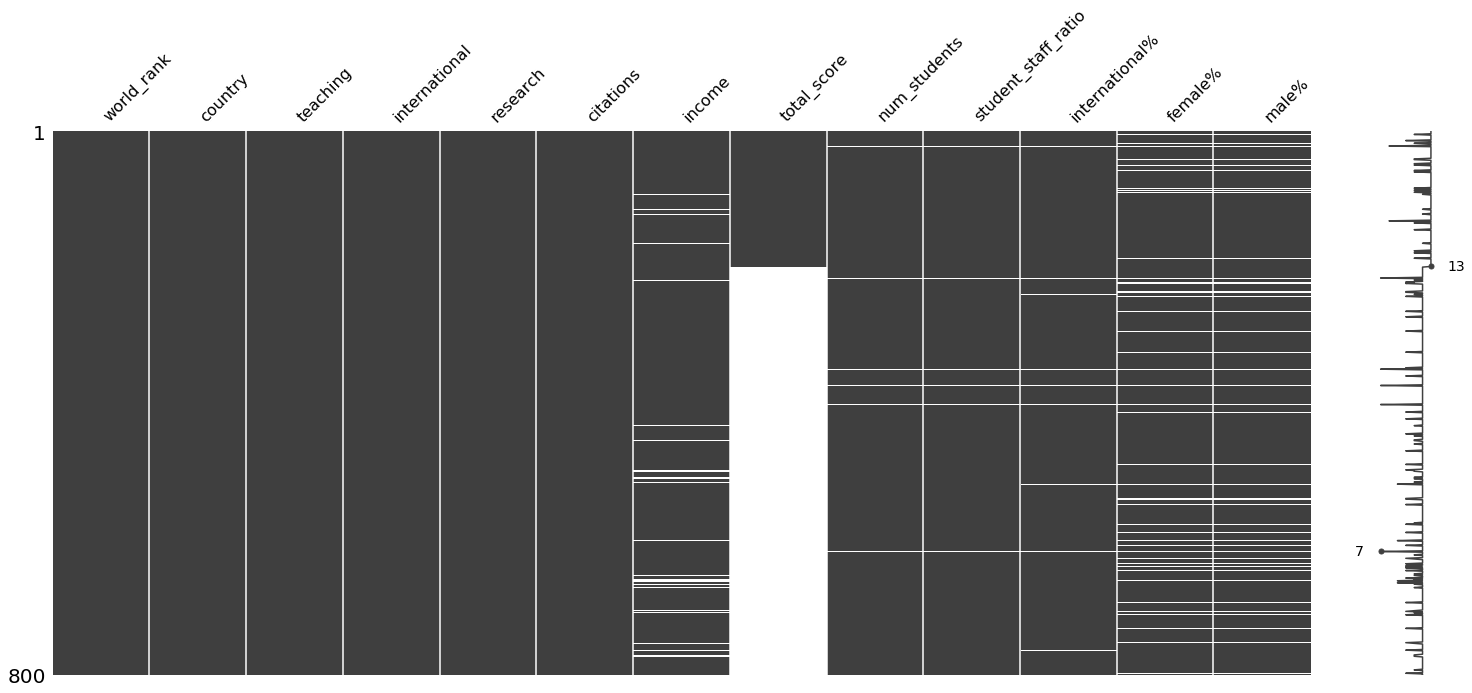

In [14]:
msno.matrix(original_data)

In [16]:
original_data.duplicated().sum()

0

In [17]:
original_data.columns

Index(['world_rank', 'country', 'teaching', 'international', 'research',
       'citations', 'income', 'total_score', 'num_students',
       'student_staff_ratio', 'international%', 'female%', 'male%'],
      dtype='object')

In [22]:
X = original_data[['teaching', 'international', 'research','citations', 'income', 'num_students',
       'student_staff_ratio', 'international%', 'female%', 'male%']]
X.describe()

,teaching,international,research,citations,income,num_students,student_staff_ratio,international%,female%,male%
count,800.0000,800.000000,800.000000,800.00000,763.000000,793.000000,793.000000,790.000000,736.000000,736.000000
mean,31.5840,48.500375,28.128625,51.30975,46.869594,24161.264817,19.116393,12.702532,49.538043,50.461957
std,14.9854,23.690816,19.532270,27.04544,20.576165,22569.224842,12.522003,10.676075,11.962238,11.962238
min,9.9000,7.100000,2.900000,1.20000,28.000000,462.000000,0.600000,0.000000,1.000000,0.000000
25%,21.0000,29.450000,14.350000,27.52500,31.600000,12331.000000,12.300000,5.000000,45.000000,43.000000
50%,27.0000,45.700000,22.100000,50.30000,38.600000,20174.000000,16.600000,10.000000,52.000000,48.000000
75%,37.5000,65.450000,35.525000,74.90000,55.250000,29700.000000,22.400000,18.000000,57.000000,55.000000
max,95.6000,99.900000,99.000000,100.00000,100.000000,379231.000000,162.600000,82.000000,100.000000,99.000000


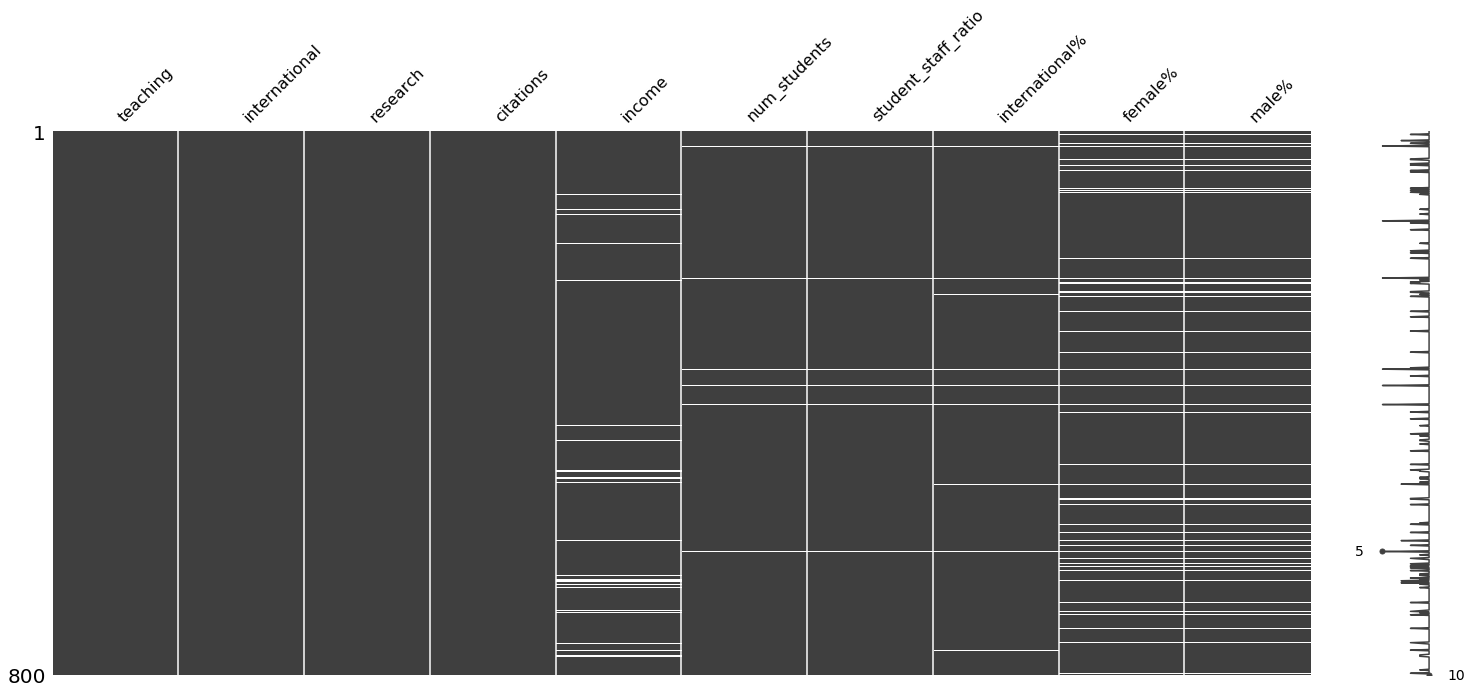

In [24]:
msno.matrix(X)

X = X.fillna(X.mean())
msno.matrix(X)

## standard scaler

In [28]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_scaled = scale.fit_transform(X)

## Performing a K-means Clustering

In [29]:
kmeans = KMeans(init='random', n_clusters=3,n_init=10)
kmeans.fit(X_scaled)
clusters =  kmeans.predict(X_scaled)

In [30]:
# Add cluster number to the original data
X_scaled_clustered = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_clustered['cluster'] = clusters

X_scaled_clustered.head()

,teaching,international,research,citations,income,num_students,student_staff_ratio,international%,female%,male%,cluster
university_name,,,,,,,,,,,
California Institute of Technology,4.274564,0.654655,3.558974,1.794039,2.536181,-0.976050,-0.980509,1.348510,-1.442358,1.442358,0
University of Oxford,3.666926,1.938656,3.625572,1.757041,1.306195,-0.188914,-0.603279,2.008736,-0.308569,0.308569,0
Stanford University,4.067566,1.174169,3.487253,1.797739,0.818185,-0.381423,-0.908273,0.876919,-0.657427,0.657427,0
University of Cambridge,3.780441,1.816169,3.512867,1.690445,0.404870,-0.238210,-0.587226,2.008736,-0.308569,0.308569,0
Massachusetts Institute of Technology,3.860569,1.499393,3.097910,1.790340,2.416668,-0.582793,-0.811959,1.914418,-1.093500,1.093500,0


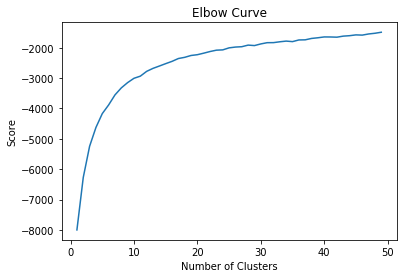

In [31]:
# Run a number of tests, for 1, 2, ... num_clusters
num_clusters = 50
kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=10) for i in range(1, num_clusters)]
score = [kmeans_tests[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans_tests))]

# Plot the curve
plt.plot(range(1, num_clusters),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()